In [104]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [105]:
df = pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv")

In [106]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [107]:
df = df[['Age','Fare','Survived']]

In [108]:
df.isnull().sum()

Age         86
Fare         1
Survived     0
dtype: int64

In [109]:
## Random sample imputation can be done only if the data is following MCAR concepts 

In [110]:
s = df['Age'].dropna().sample(df['Age'].isnull().sum() , random_state = 42)

In [111]:
s.index

Int64Index([ 27, 398,  89, 241,  68, 207, 354, 224, 262, 245,  92,   9, 399,
            157, 345, 165, 142, 182,  94, 250, 137, 172, 372, 247,   5, 138,
            330, 403, 204, 402, 209, 378,  74, 103, 295, 232, 228, 363,  55,
            147,  38,  50, 291, 226, 141,  87, 222,  53, 126, 392, 117, 293,
            254,  17, 136, 316,   7,  66, 184, 284, 374, 370, 328,   3,  95,
            309,  71, 283,  96, 333,  18,  26, 318, 405, 337, 221, 100, 139,
            179, 307, 144, 176, 220, 112, 393, 397],
           dtype='int64')

In [112]:
## we need to replace the values 

In [113]:
s.index

Int64Index([ 27, 398,  89, 241,  68, 207, 354, 224, 262, 245,  92,   9, 399,
            157, 345, 165, 142, 182,  94, 250, 137, 172, 372, 247,   5, 138,
            330, 403, 204, 402, 209, 378,  74, 103, 295, 232, 228, 363,  55,
            147,  38,  50, 291, 226, 141,  87, 222,  53, 126, 392, 117, 293,
            254,  17, 136, 316,   7,  66, 184, 284, 374, 370, 328,   3,  95,
            309,  71, 283,  96, 333,  18,  26, 318, 405, 337, 221, 100, 139,
            179, 307, 144, 176, 220, 112, 393, 397],
           dtype='int64')

In [114]:
df['Age'][10]

nan

In [115]:
df[df['Age'].isnull()].index

Int64Index([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
             84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
            132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
            199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
            256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
            292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
            380, 382, 384, 408, 410, 413, 416, 417],
           dtype='int64')

In [116]:
x = df[df['Age'].isnull()].head(1)
x

,Age,Fare,Survived
10,NaN,7.8958,0


In [117]:
def random(df , variable):
    df[variable+"_replaced"] = df[variable].copy()
    s = df['Age'].dropna().sample(df['Age'].isnull().sum() , random_state = 42)
    s.index = df[df['Age'].isnull()].index
    df.loc[df['Age'].isnull() , 'Age_replaced'] = s
    
    
    

In [118]:
random(df,'Age')

In [119]:
df.isnull().sum()

Age             86
Fare             1
Survived         0
Age_replaced     0
dtype: int64

<AxesSubplot:>

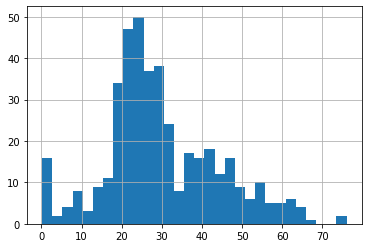

In [120]:
df['Age_replaced'].hist(bins = 30)

### Equal frequency discretisation 

In [72]:
df['Age_modified'] , intervals = pd.qcut(df['Age_replaced'] , 10 ,labels=None,
    retbins=True,precision = 3)

In [46]:
df['Age_modified']

0      (30.0, 36.0]
1      (42.0, 50.0]
2      (50.0, 76.0]
3      (24.0, 27.0]
4      (20.0, 22.0]
           ...     
413    (30.0, 36.0]
414    (36.0, 42.0]
415    (36.0, 42.0]
416    (42.0, 50.0]
417    (42.0, 50.0]
Name: Age_modified, Length: 418, dtype: category
Categories (10, interval[float64]): [(0.169, 15.7] < (15.7, 20.0] < (20.0, 22.0] < (22.0, 24.0] ... (30.0, 36.0] < (36.0, 42.0] < (42.0, 50.0] < (50.0, 76.0]]

In [47]:
df.head()

,Age,Fare,Survived,Age_replaced,Age_modified
0,34.5,7.8292,0,34.5,"(30.0, 36.0]"
1,47.0,7.0000,1,47.0,"(42.0, 50.0]"
2,62.0,9.6875,0,62.0,"(50.0, 76.0]"
3,27.0,8.6625,0,27.0,"(24.0, 27.0]"
4,22.0,12.2875,1,22.0,"(20.0, 22.0]"


In [48]:
intervals

array([ 0.17, 15.7 , 20.  , 22.  , 24.  , 27.  , 30.  , 36.  , 42.  ,
       50.  , 76.  ])

In [49]:
Age_modified.value_counts()

(24.0, 27.0]     53
(15.7, 20.0]     45
(20.0, 22.0]     45
(0.169, 15.7]    42
(30.0, 36.0]     42
(42.0, 50.0]     42
(50.0, 76.0]     39
(27.0, 30.0]     38
(22.0, 24.0]     36
(36.0, 42.0]     36
Name: Age_replaced, dtype: int64

In [51]:
df.groupby(df['Age_modified'])['Age_replaced'].count()

Age_modified
(0.169, 15.7]    42
(15.7, 20.0]     45
(20.0, 22.0]     45
(22.0, 24.0]     36
(24.0, 27.0]     53
(27.0, 30.0]     38
(30.0, 36.0]     42
(36.0, 42.0]     36
(42.0, 50.0]     42
(50.0, 76.0]     39
Name: Age_replaced, dtype: int64

<AxesSubplot:xlabel='Age_modified'>

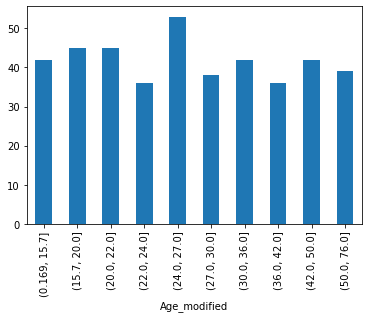

In [52]:
df.groupby(df['Age_modified'])['Age_replaced'].count().plot.bar()

In [53]:
### if we want u can add bins also , but using pandas we can find bins place and giving place is quite tuff , so use feature engine or sklearn 

In [35]:
labels = ['Bins_'+str(i) for i in range(1,11)]
labels

['Bins_1',
 'Bins_2',
 'Bins_3',
 'Bins_4',
 'Bins_5',
 'Bins_6',
 'Bins_7',
 'Bins_8',
 'Bins_9',
 'Bins_10']

In [37]:
Age_modified , intervals = pd.qcut(df['Age_replaced'] , 10 ,labels=labels,
    retbins=True,precision = 3)

In [38]:
pd.concat([Age_modified,df['Age_replaced']],axis = 1).head()

,Age_replaced,Age_replaced
0,Bins_7,34.5
1,Bins_9,47.0
2,Bins_10,62.0
3,Bins_5,27.0
4,Bins_3,22.0


In [39]:
intervals

array([ 0.17, 15.7 , 20.  , 22.  , 24.  , 27.  , 30.  , 36.  , 42.  ,
       50.  , 76.  ])

In [40]:
Age_modified.value_counts()

Bins_5     53
Bins_2     45
Bins_3     45
Bins_1     42
Bins_7     42
Bins_9     42
Bins_10    39
Bins_6     38
Bins_4     36
Bins_8     36
Name: Age_replaced, dtype: int64

### Using Feature-Engine 

In [96]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [97]:
reg = EqualFrequencyDiscretiser(q = 10 , variables = ['Age_replaced'])

In [98]:
reg.fit(df)

EqualFrequencyDiscretiser(variables=['Age_replaced'])

In [99]:
reg.binner_dict_

{'Age_replaced': [-inf,
  15.700000000000003,
  20.0,
  22.0,
  24.0,
  27.0,
  30.0,
  36.0,
  42.0,
  50.0,
  inf]}

In [100]:
df = reg.transform(df)

In [101]:
df.head()

,Age,Fare,Survived,Age_replaced
0,34.5,7.8292,0,6
1,47.0,7.0000,1,8
2,62.0,9.6875,0,9
3,27.0,8.6625,0,4
4,22.0,12.2875,1,2


### Using sklearn 

In [102]:
from sklearn.preprocessing import KBinsDiscretizer

In [103]:
reg = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [122]:
reg.fit(df['Age_replaced'].values.reshape(-1,1))

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [124]:
df['Age_replaced_sklearn'] = reg.transform(df['Age_replaced'].values.reshape(-1,1))

In [125]:
df.head()

,Age,Fare,Survived,Age_replaced,Age_replaced_sklearn
0,34.5,7.8292,0,34.5,6.0
1,47.0,7.0000,1,47.0,8.0
2,62.0,9.6875,0,62.0,9.0
3,27.0,8.6625,0,27.0,5.0
4,22.0,12.2875,1,22.0,3.0


In [126]:
reg.bin_edges_

array([array([ 0.17, 15.7 , 20.  , 22.  , 24.  , 27.  , 30.  , 36.  , 42.  ,
       50.  , 76.  ])], dtype=object)

In [127]:
reg.encode

'ordinal'